In [1]:
import pandas as pd
import numpy as np
import missingno as mn
import fancyimpute
from sklearn.preprocessing import Imputer

Using TensorFlow backend.


In [2]:
Imputer_basic = Imputer()

In [3]:
np.random.seed(1234)
x = np.random.normal(10,5,100)
y = np.random.normal(50,30,100) + x**2
z = np.random.normal(30,50,100) + x+1.5*y

In [4]:
Data = np.matrix([x,y,z]).T

In [5]:
Data.shape

(100, 3)

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

C:\Users\PC\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


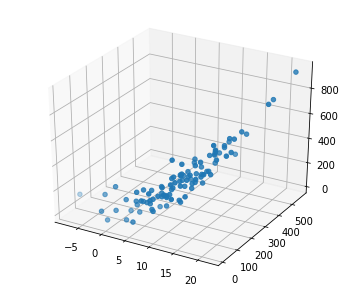

In [7]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(Data[:,0],Data[:,1],Data[:,2])
fig.show()

In [8]:
np.random.seed(1234)
miss_col = np.random.randint(0,3,50)
miss_row = np.random.randint(0,100,50)
data = [Data[row,col] for row, col in zip(miss_row, miss_col)]
for row, col in zip(miss_row, miss_col):
    Data[row,col] = np.nan

In [9]:
data[:10]

[300.28942611895752,
 191.12716849214331,
 16.959930967232037,
 10.822647714661993,
 5.5142160778015068,
 215.07483301231045,
 89.982608235590703,
 204.67667896186435,
 187.0679840460777,
 164.30211626341793]

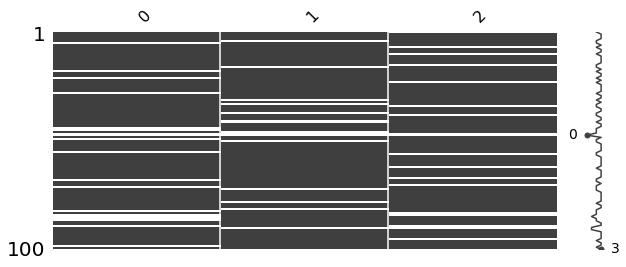

In [10]:
df = pd.DataFrame(Data)
mn.matrix(df, figsize=(10,4))

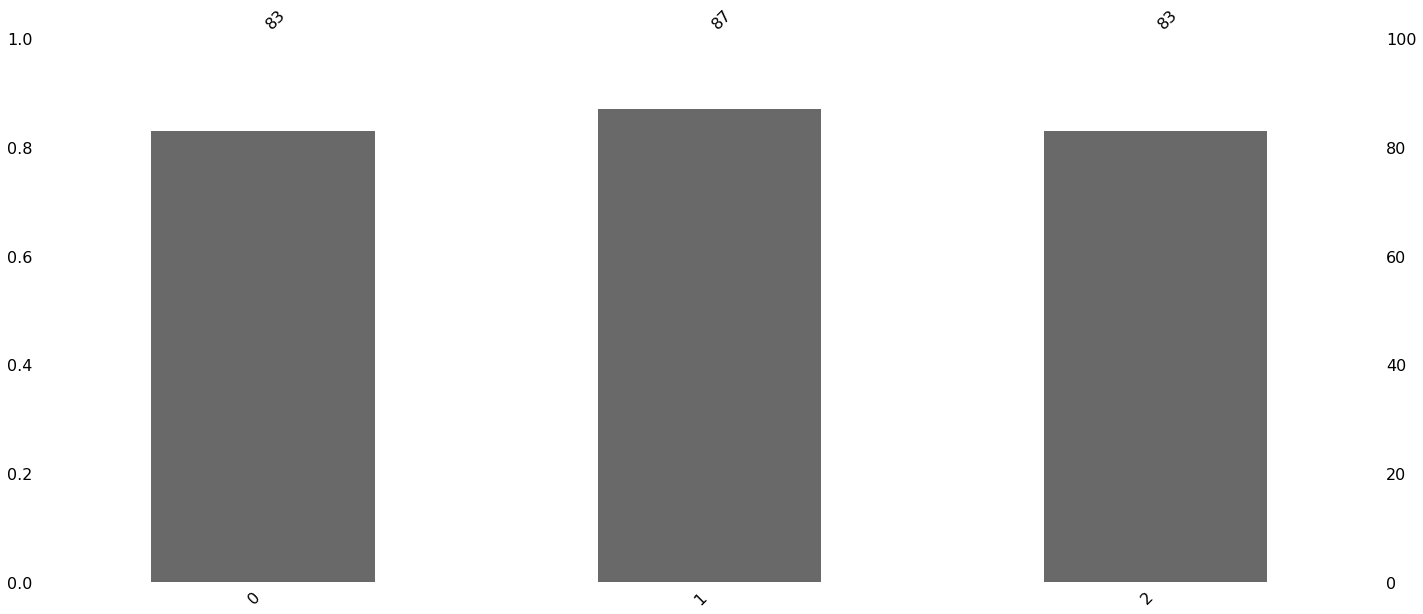

In [11]:
mn.bar(df)

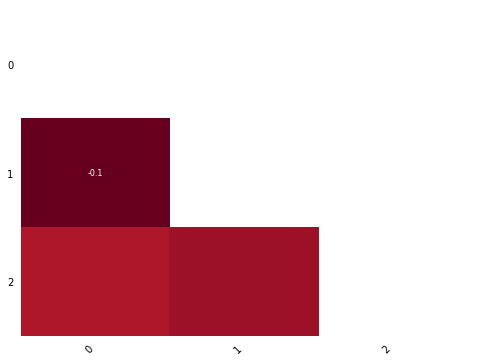

In [12]:
mn.heatmap(df,figsize=(8,6), fontsize=10)

In [13]:
Data0 = Imputer_basic.fit_transform(df)

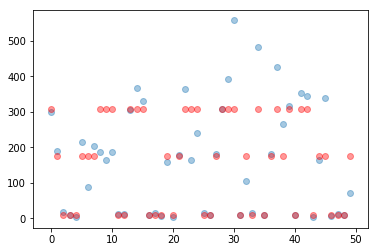

In [14]:
d0 = [Data0[r,c] for r,c in zip(miss_row, miss_col)]
plt.scatter(x=range(len(data)),y = data, alpha=0.4)
plt.scatter(x=range(len(data)),y = d0, c='red',alpha=0.4)
plt.show()

In [15]:
YYY = fancyimpute.MICE(verbose=False)

In [16]:
Data1 = YYY.complete(Data)

In [17]:
d1 = [Data1[r,c] for r,c in zip(miss_row, miss_col)]

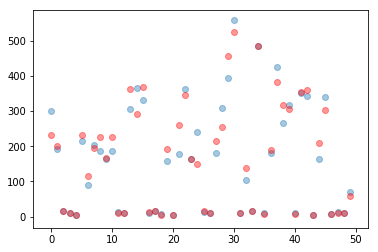

In [18]:
plt.scatter(x=range(len(data)),y = data, alpha=0.4)
plt.scatter(x=range(len(data)),y = d1, c='red',alpha=0.4)
plt.show()

In [19]:
ZZZ = fancyimpute.IterativeSVD(rank=1, verbose=False)

In [20]:
Data2 = ZZZ.complete(Data)

C:\Users\PC\Anaconda3\lib\site-packages\fancyimpute\iterative_svd.py:53: RuntimeWarning: divide by zero encountered in double_scalars
  return (ssd / old_norm_squared) < self.convergence_threshold


In [21]:
d2 = [Data2[r,c] for r,c in zip(miss_row, miss_col)]

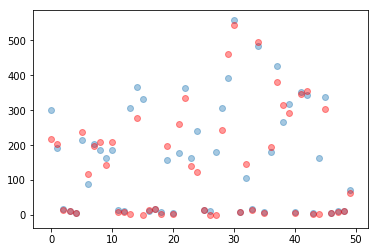

In [22]:
plt.scatter(x=range(len(data)),y = data, alpha=0.4)
plt.scatter(x=range(len(data)),y = d2, c='red', alpha=0.4)
plt.show()

In [23]:
AAA = fancyimpute.SoftImpute(verbose=False)

In [24]:
Data3 = AAA.complete(Data)

C:\Users\PC\Anaconda3\lib\site-packages\fancyimpute\soft_impute.py:100: RuntimeWarning: divide by zero encountered in double_scalars
  return (np.sqrt(ssd) / old_norm) < self.convergence_threshold


In [25]:
d3 = [[Data3[r,c] for r,c in zip(miss_row, miss_col)]]

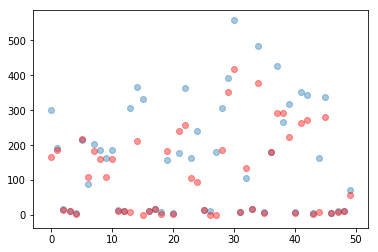

In [26]:
plt.scatter(x=range(len(data)),y = data,alpha=0.4)
plt.scatter(x=range(len(data)),y = d3, c='red', alpha=0.4)
plt.show()

In [27]:
BBB = fancyimpute.MatrixFactorization(rank=3, verbose=False)

In [28]:
Data4 = BBB.complete(Data)

Train on 227 samples, validate on 26 samples
Epoch 1/10000
 - 0s - loss: 1.2023 - val_loss: 0.8850
Epoch 2/10000
 - 0s - loss: 1.1986 - val_loss: 0.8842
Epoch 3/10000
 - 0s - loss: 1.1959 - val_loss: 0.8834
Epoch 4/10000
 - 0s - loss: 1.1934 - val_loss: 0.8827
Epoch 5/10000
 - 0s - loss: 1.1909 - val_loss: 0.8819
Epoch 6/10000
 - 0s - loss: 1.1884 - val_loss: 0.8811
Epoch 7/10000
 - 0s - loss: 1.1858 - val_loss: 0.8803
Epoch 8/10000
 - 0s - loss: 1.1832 - val_loss: 0.8794
Epoch 9/10000
 - 0s - loss: 1.1805 - val_loss: 0.8785
Epoch 10/10000
 - 0s - loss: 1.1777 - val_loss: 0.8776
Epoch 11/10000
 - 0s - loss: 1.1750 - val_loss: 0.8766
Epoch 12/10000
 - 0s - loss: 1.1722 - val_loss: 0.8757
Epoch 13/10000
 - 0s - loss: 1.1693 - val_loss: 0.8746
Epoch 14/10000
 - 0s - loss: 1.1664 - val_loss: 0.8736
Epoch 15/10000
 - 0s - loss: 1.1636 - val_loss: 0.8725
Epoch 16/10000
 - 0s - loss: 1.1607 - val_loss: 0.8714
Epoch 17/10000
 - 0s - loss: 1.1577 - val_loss: 0.8702
Epoch 18/10000
 - 0s - loss: 

Epoch 149/10000
 - 0s - loss: 0.8519 - val_loss: 0.6882
Epoch 150/10000
 - 0s - loss: 0.8501 - val_loss: 0.6870
Epoch 151/10000
 - 0s - loss: 0.8483 - val_loss: 0.6857
Epoch 152/10000
 - 0s - loss: 0.8466 - val_loss: 0.6845
Epoch 153/10000
 - 0s - loss: 0.8448 - val_loss: 0.6833
Epoch 154/10000
 - 0s - loss: 0.8431 - val_loss: 0.6821
Epoch 155/10000
 - 0s - loss: 0.8413 - val_loss: 0.6809
Epoch 156/10000
 - 0s - loss: 0.8396 - val_loss: 0.6797
Epoch 157/10000
 - 0s - loss: 0.8378 - val_loss: 0.6785
Epoch 158/10000
 - 0s - loss: 0.8361 - val_loss: 0.6773
Epoch 159/10000
 - 0s - loss: 0.8344 - val_loss: 0.6761
Epoch 160/10000
 - 0s - loss: 0.8327 - val_loss: 0.6750
Epoch 161/10000
 - 0s - loss: 0.8310 - val_loss: 0.6738
Epoch 162/10000
 - 0s - loss: 0.8292 - val_loss: 0.6726
Epoch 163/10000
 - 0s - loss: 0.8275 - val_loss: 0.6714
Epoch 164/10000
 - 0s - loss: 0.8258 - val_loss: 0.6702
Epoch 165/10000
 - 0s - loss: 0.8241 - val_loss: 0.6691
Epoch 166/10000
 - 0s - loss: 0.8224 - val_loss:

Epoch 296/10000
 - 0s - loss: 0.6252 - val_loss: 0.5374
Epoch 297/10000
 - 0s - loss: 0.6238 - val_loss: 0.5366
Epoch 298/10000
 - 0s - loss: 0.6224 - val_loss: 0.5357
Epoch 299/10000
 - 0s - loss: 0.6209 - val_loss: 0.5348
Epoch 300/10000
 - 0s - loss: 0.6195 - val_loss: 0.5340
Epoch 301/10000
 - 0s - loss: 0.6181 - val_loss: 0.5331
Epoch 302/10000
 - 0s - loss: 0.6166 - val_loss: 0.5323
Epoch 303/10000
 - 0s - loss: 0.6152 - val_loss: 0.5314
Epoch 304/10000
 - 0s - loss: 0.6138 - val_loss: 0.5306
Epoch 305/10000
 - 0s - loss: 0.6124 - val_loss: 0.5297
Epoch 306/10000
 - 0s - loss: 0.6109 - val_loss: 0.5289
Epoch 307/10000
 - 0s - loss: 0.6095 - val_loss: 0.5280
Epoch 308/10000
 - 0s - loss: 0.6081 - val_loss: 0.5272
Epoch 309/10000
 - 0s - loss: 0.6066 - val_loss: 0.5263
Epoch 310/10000
 - 0s - loss: 0.6052 - val_loss: 0.5255
Epoch 311/10000
 - 0s - loss: 0.6038 - val_loss: 0.5246
Epoch 312/10000
 - 0s - loss: 0.6024 - val_loss: 0.5238
Epoch 313/10000
 - 0s - loss: 0.6009 - val_loss:

Epoch 443/10000
 - 0s - loss: 0.4192 - val_loss: 0.4180
Epoch 444/10000
 - 0s - loss: 0.4178 - val_loss: 0.4172
Epoch 445/10000
 - 0s - loss: 0.4165 - val_loss: 0.4163
Epoch 446/10000
 - 0s - loss: 0.4152 - val_loss: 0.4155
Epoch 447/10000
 - 0s - loss: 0.4139 - val_loss: 0.4147
Epoch 448/10000
 - 0s - loss: 0.4125 - val_loss: 0.4139
Epoch 449/10000
 - 0s - loss: 0.4112 - val_loss: 0.4131
Epoch 450/10000
 - 0s - loss: 0.4099 - val_loss: 0.4123
Epoch 451/10000
 - 0s - loss: 0.4086 - val_loss: 0.4115
Epoch 452/10000
 - 0s - loss: 0.4073 - val_loss: 0.4107
Epoch 453/10000
 - 0s - loss: 0.4059 - val_loss: 0.4099
Epoch 454/10000
 - 0s - loss: 0.4046 - val_loss: 0.4091
Epoch 455/10000
 - 0s - loss: 0.4033 - val_loss: 0.4083
Epoch 456/10000
 - 0s - loss: 0.4020 - val_loss: 0.4075
Epoch 457/10000
 - 0s - loss: 0.4007 - val_loss: 0.4067
Epoch 458/10000
 - 0s - loss: 0.3994 - val_loss: 0.4059
Epoch 459/10000
 - 0s - loss: 0.3981 - val_loss: 0.4050
Epoch 460/10000
 - 0s - loss: 0.3968 - val_loss:

Epoch 590/10000
 - 0s - loss: 0.2517 - val_loss: 0.3052
Epoch 591/10000
 - 0s - loss: 0.2508 - val_loss: 0.3045
Epoch 592/10000
 - 0s - loss: 0.2499 - val_loss: 0.3039
Epoch 593/10000
 - 0s - loss: 0.2490 - val_loss: 0.3032
Epoch 594/10000
 - 0s - loss: 0.2481 - val_loss: 0.3025
Epoch 595/10000
 - 0s - loss: 0.2472 - val_loss: 0.3018
Epoch 596/10000
 - 0s - loss: 0.2463 - val_loss: 0.3012
Epoch 597/10000
 - 0s - loss: 0.2454 - val_loss: 0.3005
Epoch 598/10000
 - 0s - loss: 0.2445 - val_loss: 0.2998
Epoch 599/10000
 - 0s - loss: 0.2436 - val_loss: 0.2991
Epoch 600/10000
 - 0s - loss: 0.2427 - val_loss: 0.2985
Epoch 601/10000
 - 0s - loss: 0.2419 - val_loss: 0.2978
Epoch 602/10000
 - 0s - loss: 0.2410 - val_loss: 0.2971
Epoch 603/10000
 - 0s - loss: 0.2401 - val_loss: 0.2965
Epoch 604/10000
 - 0s - loss: 0.2392 - val_loss: 0.2958
Epoch 605/10000
 - 0s - loss: 0.2384 - val_loss: 0.2952
Epoch 606/10000
 - 0s - loss: 0.2375 - val_loss: 0.2945
Epoch 607/10000
 - 0s - loss: 0.2367 - val_loss:

Epoch 737/10000
 - 0s - loss: 0.1504 - val_loss: 0.2246
Epoch 738/10000
 - 0s - loss: 0.1499 - val_loss: 0.2242
Epoch 739/10000
 - 0s - loss: 0.1494 - val_loss: 0.2238
Epoch 740/10000
 - 0s - loss: 0.1489 - val_loss: 0.2234
Epoch 741/10000
 - 0s - loss: 0.1484 - val_loss: 0.2230
Epoch 742/10000
 - 0s - loss: 0.1480 - val_loss: 0.2226
Epoch 743/10000
 - 0s - loss: 0.1475 - val_loss: 0.2222
Epoch 744/10000
 - 0s - loss: 0.1470 - val_loss: 0.2218
Epoch 745/10000
 - 0s - loss: 0.1465 - val_loss: 0.2214
Epoch 746/10000
 - 0s - loss: 0.1460 - val_loss: 0.2210
Epoch 747/10000
 - 0s - loss: 0.1456 - val_loss: 0.2206
Epoch 748/10000
 - 0s - loss: 0.1451 - val_loss: 0.2202
Epoch 749/10000
 - 0s - loss: 0.1446 - val_loss: 0.2198
Epoch 750/10000
 - 0s - loss: 0.1442 - val_loss: 0.2194
Epoch 751/10000
 - 0s - loss: 0.1437 - val_loss: 0.2190
Epoch 752/10000
 - 0s - loss: 0.1432 - val_loss: 0.2186
Epoch 753/10000
 - 0s - loss: 0.1428 - val_loss: 0.2183
Epoch 754/10000
 - 0s - loss: 0.1423 - val_loss:

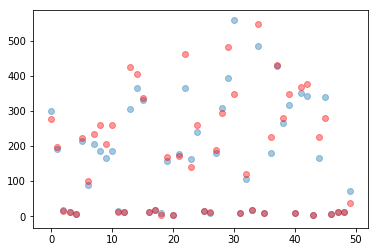

In [29]:
d4 = [[Data4[r,c] for r,c in zip(miss_row, miss_col)]]
plt.scatter(x=range(len(data)),y = data, alpha=0.4)
plt.scatter(x=range(len(data)),y = d4, c='red',alpha=0.4)
plt.show()

In [30]:
print(np.sqrt(np.sum(np.square(np.array(data)-np.array(d1)))/len(data)))
print(np.sqrt(np.sum(np.square(np.array(data)-np.array(d2)))/len(data)))
print(np.sqrt(np.sum(np.square(np.array(data)-np.array(d3)))/len(data)))
print(np.sqrt(np.sum(np.square(np.array(data)-np.array(d4)))/len(data)))

32.8384671418
79.8604814636
93.2290896448
46.7582034045


In [31]:
auto_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
auto = pd.read_csv(auto_path, header=None,na_values="?")
auto_varnames = ['symboling','normalized_losses','make','fuel_type','aspiration',
                        'num_of_doors','body_style','drive_wheels','engine_location',
                        'wheel_base','length','width','height','curb_weight','engine_type',
                        'num_of_cylinders','engine_size','fuel_system','bore','stroke',
                        'compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']
auto.columns = auto_varnames

In [32]:
auto.isnull().sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

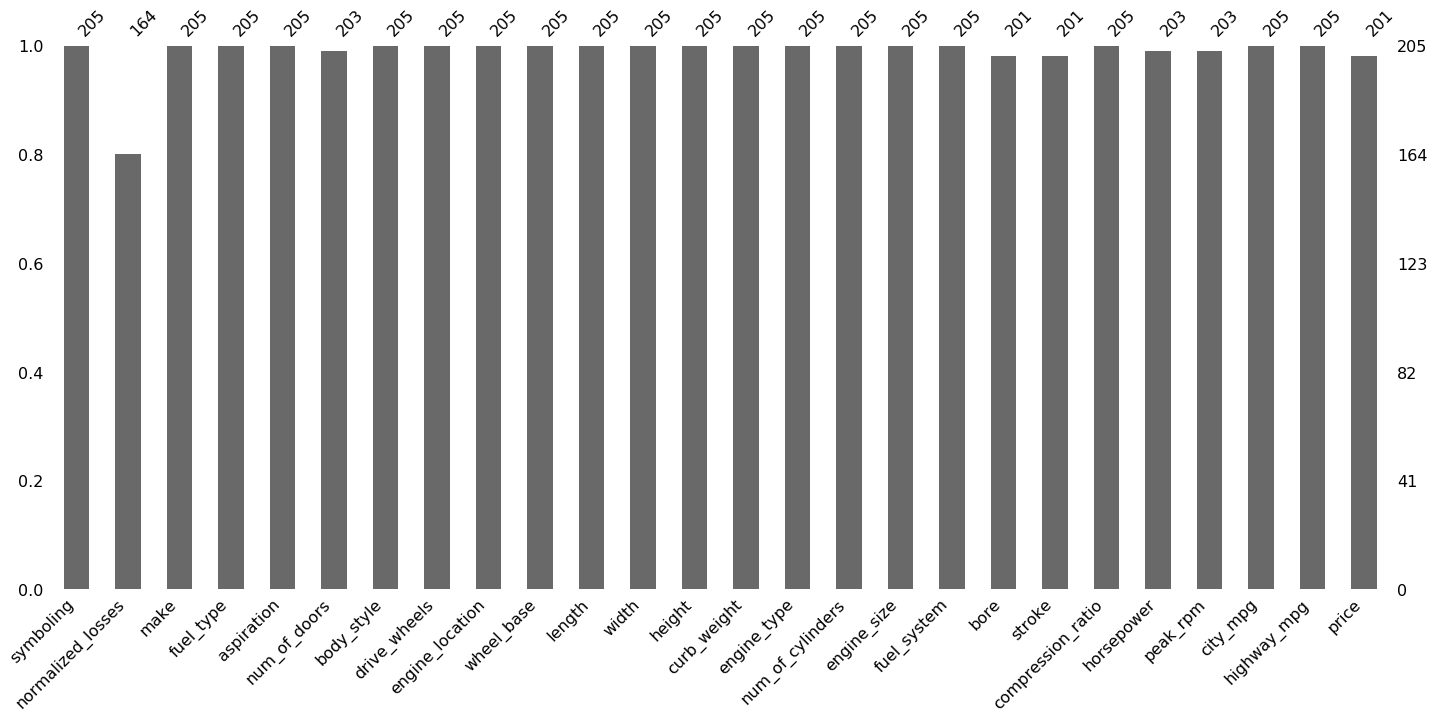

In [33]:
mn.bar(auto)

In [36]:
pd.get_dummies(auto).shape

(205, 76)

In [37]:
YYY.complete(pd.get_dummies(auto))

array([[  3.        , 123.42385511,  88.6       , ...,   1.        ,
          0.        ,   0.        ],
       [  3.        , 136.17141676,  88.6       , ...,   1.        ,
          0.        ,   0.        ],
       [  1.        , 121.21317915,  94.5       , ...,   1.        ,
          0.        ,   0.        ],
       ...,
       [ -1.        ,  95.        , 109.1       , ...,   1.        ,
          0.        ,   0.        ],
       [ -1.        ,  95.        , 109.1       , ...,   0.        ,
          0.        ,   0.        ],
       [ -1.        ,  95.        , 109.1       , ...,   1.        ,
          0.        ,   0.        ]])

In [3]:
auto_data=pd.read_table("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",header = None,na_values="?",sep= "\s+")

In [4]:
var = ['mpg','cyl','disp','hp','wt','acc','year','origin','name']
auto_data.columns=var
auto_data.head()


,mpg,cyl,disp,hp,wt,acc,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [5]:
auto_data.isnull().sum()

mpg       0
cyl       0
disp      0
hp        6
wt        0
acc       0
year      0
origin    0
name      0
dtype: int64

In [8]:
auto_data.shape

(398, 9)

In [9]:
auto_data_cleaned=auto_data.dropna()

In [11]:
auto_data_cleaned.shape

(392, 9)

In [65]:
from sklearn import preprocessing
x1 = auto_data_cleaned.iloc[:, [0,2,3,4,5]]
x2 = auto_data_cleaned.iloc[:, [0,2,3,4,5]]
x3=pd.DataFrame(preprocessing.scale(x2))
x3.head()

,0,1,2,3,4
0,-0.698638,1.077290,0.664133,0.620540,-1.285258
1,-1.083498,1.488732,1.574594,0.843334,-1.466724
2,-0.698638,1.182542,1.184397,0.540382,-1.648189
3,-0.955212,1.048584,1.184397,0.536845,-1.285258
4,-0.826925,1.029447,0.924265,0.555706,-1.829655


In [66]:
x1.columns=[0,1,2,3,4]
x1.set_index(np.array(range(0,392)),inplace=True)
x3.set_index(np.array(range(0,392)),inplace=True)

In [67]:
np.random.seed(1234)
miss_col = np.random.randint(0,5,40)
miss_row = np.random.randint(0,392,40)
data = [x3[col][row] for row, col in zip(miss_row, miss_col)]
for i,j in zip(miss_col,miss_row):
    x3[i][j]=np.nan

In [68]:
x3.isnull().sum()

0     7
1     7
2     8
3    11
4     7
dtype: int64

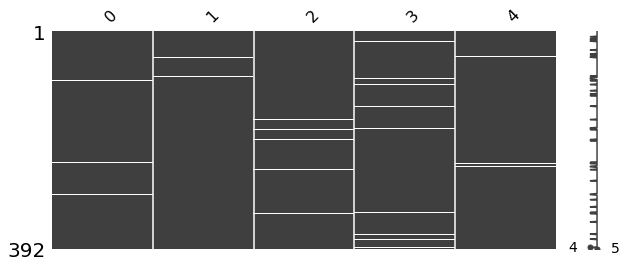

In [69]:
mn.matrix(x3, figsize=(10,4))

In [47]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

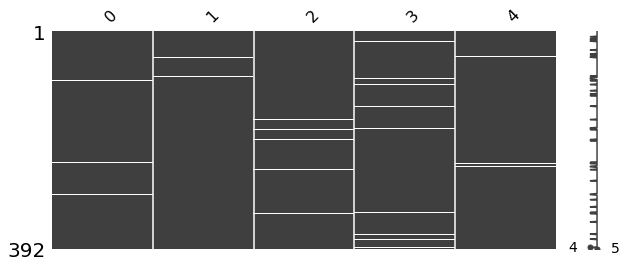

In [48]:
mn.matrix(x1, figsize=(10,4))

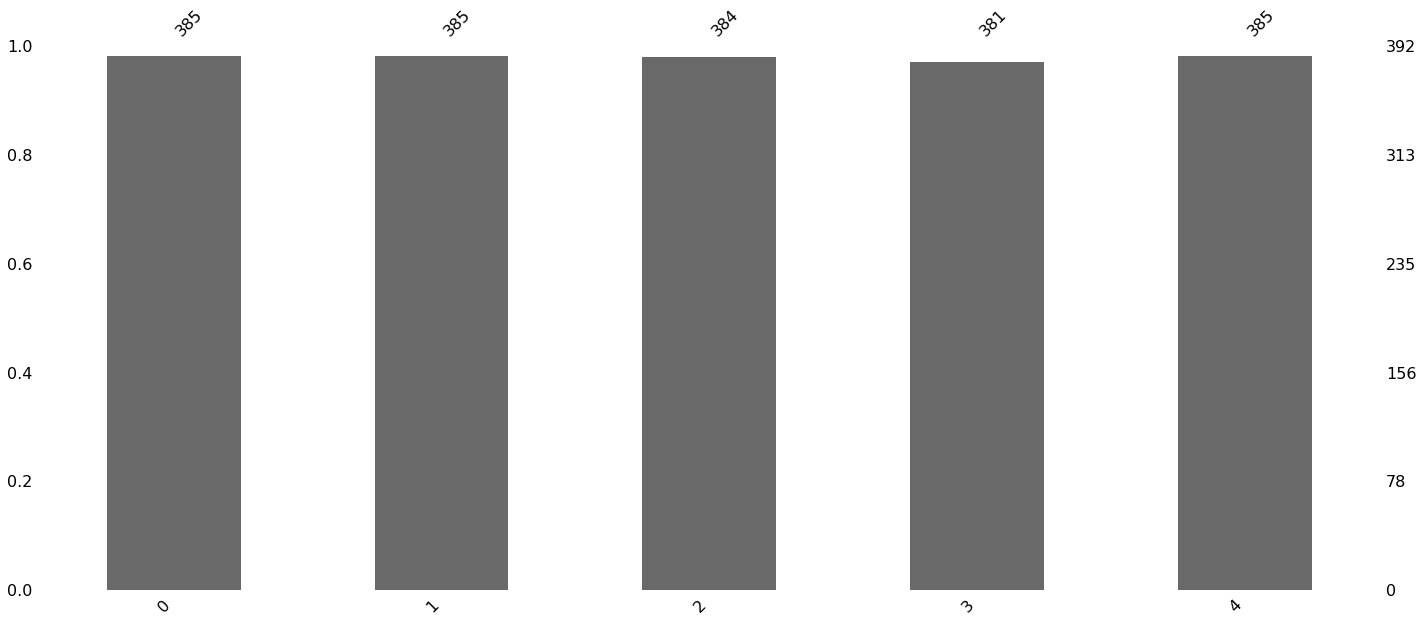

In [50]:
mn.bar(x1)

In [70]:
YYY=fancyimpute.MICE(verbose=False)
Data1 = YYY.complete(x3)
type(Data1)

numpy.ndarray

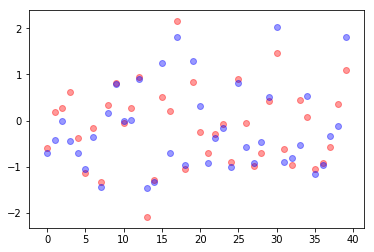

In [71]:
d1=[[Data1[r,c] for r,c in zip(miss_row,miss_col)] ]
plt.scatter(x=range(len(data)),y=d1,c='red',alpha=0.4)
plt.scatter(x=range(len(data)),y=data,c='blue',alpha=0.4)
plt.show()

In [72]:
print(np.sqrt(np.sum(np.square(np.array(data)-np.array(d1)))/len(data)))#value and graph is when data is normalised,to check for raw data..change the dataset above

0.420081144884


In [73]:
BBB = fancyimpute.MatrixFactorization(rank=3, verbose=False)
datam=BBB.complete(x3)

Train on 1728 samples, validate on 192 samples
Epoch 1/10000
 - 1s - loss: 1.4182 - val_loss: 1.3665
Epoch 2/10000
 - 0s - loss: 1.4136 - val_loss: 1.3646
Epoch 3/10000
 - 0s - loss: 1.4103 - val_loss: 1.3629
Epoch 4/10000
 - 0s - loss: 1.4072 - val_loss: 1.3612
Epoch 5/10000
 - 0s - loss: 1.4042 - val_loss: 1.3595
Epoch 6/10000
 - 0s - loss: 1.4010 - val_loss: 1.3578
Epoch 7/10000
 - 0s - loss: 1.3979 - val_loss: 1.3561
Epoch 8/10000
 - 0s - loss: 1.3946 - val_loss: 1.3544
Epoch 9/10000
 - 0s - loss: 1.3913 - val_loss: 1.3526
Epoch 10/10000
 - 0s - loss: 1.3879 - val_loss: 1.3508
Epoch 11/10000
 - 0s - loss: 1.3845 - val_loss: 1.3490
Epoch 12/10000
 - 0s - loss: 1.3810 - val_loss: 1.3472
Epoch 13/10000
 - 0s - loss: 1.3775 - val_loss: 1.3453
Epoch 14/10000
 - 0s - loss: 1.3739 - val_loss: 1.3435
Epoch 15/10000
 - 0s - loss: 1.3704 - val_loss: 1.3416
Epoch 16/10000
 - 0s - loss: 1.3668 - val_loss: 1.3397
Epoch 17/10000
 - 0s - loss: 1.3632 - val_loss: 1.3379
Epoch 18/10000
 - 0s - loss

Epoch 149/10000
 - 0s - loss: 0.9958 - val_loss: 1.1247
Epoch 150/10000
 - 0s - loss: 0.9938 - val_loss: 1.1233
Epoch 151/10000
 - 0s - loss: 0.9917 - val_loss: 1.1220
Epoch 152/10000
 - 0s - loss: 0.9896 - val_loss: 1.1206
Epoch 153/10000
 - 0s - loss: 0.9876 - val_loss: 1.1193
Epoch 154/10000
 - 0s - loss: 0.9856 - val_loss: 1.1179
Epoch 155/10000
 - 0s - loss: 0.9835 - val_loss: 1.1166
Epoch 156/10000
 - 0s - loss: 0.9815 - val_loss: 1.1152
Epoch 157/10000
 - 0s - loss: 0.9795 - val_loss: 1.1138
Epoch 158/10000
 - 0s - loss: 0.9775 - val_loss: 1.1125
Epoch 159/10000
 - 0s - loss: 0.9754 - val_loss: 1.1112
Epoch 160/10000
 - 0s - loss: 0.9734 - val_loss: 1.1098
Epoch 161/10000
 - 0s - loss: 0.9714 - val_loss: 1.1085
Epoch 162/10000
 - 0s - loss: 0.9695 - val_loss: 1.1071
Epoch 163/10000
 - 0s - loss: 0.9675 - val_loss: 1.1058
Epoch 164/10000
 - 0s - loss: 0.9655 - val_loss: 1.1045
Epoch 165/10000
 - 0s - loss: 0.9635 - val_loss: 1.1031
Epoch 166/10000
 - 0s - loss: 0.9616 - val_loss:

Epoch 296/10000
 - 0s - loss: 0.7388 - val_loss: 0.9359
Epoch 297/10000
 - 0s - loss: 0.7372 - val_loss: 0.9346
Epoch 298/10000
 - 0s - loss: 0.7356 - val_loss: 0.9334
Epoch 299/10000
 - 0s - loss: 0.7341 - val_loss: 0.9321
Epoch 300/10000
 - 0s - loss: 0.7325 - val_loss: 0.9309
Epoch 301/10000
 - 0s - loss: 0.7310 - val_loss: 0.9296
Epoch 302/10000
 - 0s - loss: 0.7294 - val_loss: 0.9283
Epoch 303/10000
 - 0s - loss: 0.7279 - val_loss: 0.9271
Epoch 304/10000
 - 0s - loss: 0.7263 - val_loss: 0.9258
Epoch 305/10000
 - 0s - loss: 0.7248 - val_loss: 0.9246
Epoch 306/10000
 - 0s - loss: 0.7232 - val_loss: 0.9233
Epoch 307/10000
 - 0s - loss: 0.7217 - val_loss: 0.9221
Epoch 308/10000
 - 0s - loss: 0.7201 - val_loss: 0.9208
Epoch 309/10000
 - 0s - loss: 0.7186 - val_loss: 0.9196
Epoch 310/10000
 - 0s - loss: 0.7170 - val_loss: 0.9183
Epoch 311/10000
 - 0s - loss: 0.7155 - val_loss: 0.9171
Epoch 312/10000
 - 0s - loss: 0.7140 - val_loss: 0.9158
Epoch 313/10000
 - 0s - loss: 0.7124 - val_loss:

Epoch 443/10000
 - 0s - loss: 0.5220 - val_loss: 0.7524
Epoch 444/10000
 - 0s - loss: 0.5206 - val_loss: 0.7512
Epoch 445/10000
 - 0s - loss: 0.5193 - val_loss: 0.7500
Epoch 446/10000
 - 0s - loss: 0.5179 - val_loss: 0.7488
Epoch 447/10000
 - 0s - loss: 0.5165 - val_loss: 0.7475
Epoch 448/10000
 - 0s - loss: 0.5151 - val_loss: 0.7463
Epoch 449/10000
 - 0s - loss: 0.5138 - val_loss: 0.7451
Epoch 450/10000
 - 0s - loss: 0.5124 - val_loss: 0.7439
Epoch 451/10000
 - 0s - loss: 0.5110 - val_loss: 0.7427
Epoch 452/10000
 - 0s - loss: 0.5097 - val_loss: 0.7415
Epoch 453/10000
 - 0s - loss: 0.5083 - val_loss: 0.7402
Epoch 454/10000
 - 0s - loss: 0.5069 - val_loss: 0.7390
Epoch 455/10000
 - 0s - loss: 0.5056 - val_loss: 0.7378
Epoch 456/10000
 - 0s - loss: 0.5042 - val_loss: 0.7366
Epoch 457/10000
 - 0s - loss: 0.5028 - val_loss: 0.7354
Epoch 458/10000
 - 0s - loss: 0.5015 - val_loss: 0.7342
Epoch 459/10000
 - 0s - loss: 0.5001 - val_loss: 0.7330
Epoch 460/10000
 - 0s - loss: 0.4988 - val_loss:

Epoch 590/10000
 - 0s - loss: 0.3409 - val_loss: 0.5886
Epoch 591/10000
 - 0s - loss: 0.3398 - val_loss: 0.5876
Epoch 592/10000
 - 0s - loss: 0.3388 - val_loss: 0.5867
Epoch 593/10000
 - 0s - loss: 0.3377 - val_loss: 0.5857
Epoch 594/10000
 - 0s - loss: 0.3367 - val_loss: 0.5848
Epoch 595/10000
 - 0s - loss: 0.3357 - val_loss: 0.5838
Epoch 596/10000
 - 0s - loss: 0.3346 - val_loss: 0.5829
Epoch 597/10000
 - 0s - loss: 0.3336 - val_loss: 0.5820
Epoch 598/10000
 - 0s - loss: 0.3326 - val_loss: 0.5811
Epoch 599/10000
 - 0s - loss: 0.3315 - val_loss: 0.5801
Epoch 600/10000
 - 0s - loss: 0.3305 - val_loss: 0.5792
Epoch 601/10000
 - 0s - loss: 0.3295 - val_loss: 0.5783
Epoch 602/10000
 - 0s - loss: 0.3285 - val_loss: 0.5774
Epoch 603/10000
 - 0s - loss: 0.3274 - val_loss: 0.5765
Epoch 604/10000
 - 0s - loss: 0.3264 - val_loss: 0.5756
Epoch 605/10000
 - 0s - loss: 0.3254 - val_loss: 0.5747
Epoch 606/10000
 - 0s - loss: 0.3244 - val_loss: 0.5738
Epoch 607/10000
 - 0s - loss: 0.3234 - val_loss:

Epoch 737/10000
 - 0s - loss: 0.2168 - val_loss: 0.4823
Epoch 738/10000
 - 0s - loss: 0.2162 - val_loss: 0.4820
Epoch 739/10000
 - 0s - loss: 0.2155 - val_loss: 0.4813
Epoch 740/10000
 - 0s - loss: 0.2149 - val_loss: 0.4810
Epoch 741/10000
 - 0s - loss: 0.2143 - val_loss: 0.4804
Epoch 742/10000
 - 0s - loss: 0.2137 - val_loss: 0.4800
Epoch 743/10000
 - 0s - loss: 0.2130 - val_loss: 0.4794
Epoch 744/10000
 - 0s - loss: 0.2124 - val_loss: 0.4790
Epoch 745/10000
 - 0s - loss: 0.2118 - val_loss: 0.4785
Epoch 746/10000
 - 0s - loss: 0.2112 - val_loss: 0.4781
Epoch 747/10000
 - 0s - loss: 0.2105 - val_loss: 0.4775
Epoch 748/10000
 - 0s - loss: 0.2099 - val_loss: 0.4771
Epoch 749/10000
 - 0s - loss: 0.2093 - val_loss: 0.4766
Epoch 750/10000
 - 0s - loss: 0.2087 - val_loss: 0.4762
Epoch 751/10000
 - 0s - loss: 0.2081 - val_loss: 0.4757
Epoch 752/10000
 - 0s - loss: 0.2075 - val_loss: 0.4752
Epoch 753/10000
 - 0s - loss: 0.2069 - val_loss: 0.4747
Epoch 754/10000
 - 0s - loss: 0.2063 - val_loss:

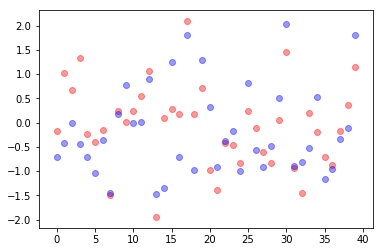

In [74]:
d1=[[datam[r,c] for r,c in zip(miss_row,miss_col)] ]
plt.scatter(x=range(len(data)),y=d1,c='red',alpha=0.4)
plt.scatter(x=range(len(data)),y=data,c='blue',alpha=0.4)
plt.show()

In [75]:
print(np.sqrt(np.sum(np.square(np.array(data)-np.array(d1)))/len(data)))

0.691324645731
